In [1]:
import qiskit as q
%matplotlib inline

In [2]:
circuit = q.QuantumCircuit(2, 2)    # 2 qubits and 2 classical bits

In [19]:
# currently: 0,0

circuit.x(0)  # not gate
# 1, 0

circuit.cx(0, 1)  # cnot or controlled not. That means, it Flips 2nd qubit value IF first qubit is a 1
# 1, 1

circuit.measure([0, 1], [0, 1])  # measure the value and map from qubit to classical bit

In [4]:
circuit.draw()

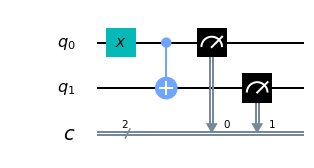

In [5]:
circuit.draw(output="mpl")

In [9]:
from qiskit import IBMQ

IBMQ.save_account(open("ibmq_token.txt", "r").read())

Credentials already present. Set overwrite=True to overwrite.


In [11]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider("ibm-q")

In [13]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 7 queued and 5 qubits
ibmq_16_melbourne has 10 queued and 14 qubits
ibmq_vigo has 12 queued and 5 qubits
ibmq_ourense has 13 queued and 5 qubits
ibmq_london has 6 queued and 5 qubits
ibmq_burlington has 7 queued and 5 qubits
ibmq_essex has 7 queued and 5 qubits


## Running on a Quantum Machine

In [14]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_london")  # with lowest jobs queued
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


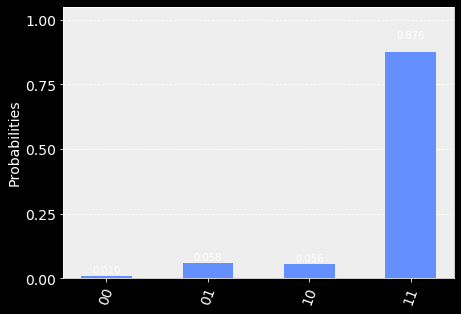

In [18]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

## Running on a Simulator

In [21]:
backend = provider.get_backend("ibmq_qasm_simulator")  # this one is the simulator

circuit = q.QuantumCircuit(2, 2)    # 2 qubits and 2 classical bits

# currently: 0,0

circuit.h(0)  # hadamard gate: this takes the qubit 0 in superposition
# 1, 0

circuit.cx(0, 1)  # cnot or controlled not. That means, it Flips 2nd qubit value IF first qubit is a 1
# 1, 1

circuit.measure([0, 1], [0, 1])  # measure the value and map from qubit to classical bit
circuit.draw()

In [22]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


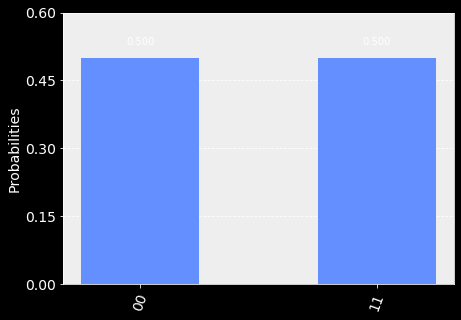

In [23]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

## Run on Local Simulator

In [25]:
from qiskit import Aer  # simulator framework for qiskit

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator


Job Status: job has successfully run


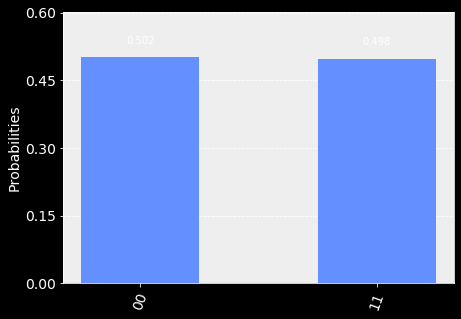

In [26]:
sim_backend = Aer.get_backend("qasm_simulator")

job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])